In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte, filters, feature, segmentation, img_as_float, exposure
from scipy import ndimage
from sklearn import cluster
from skimage.filters.rank import entropy, minimum
from skimage.morphology import disk

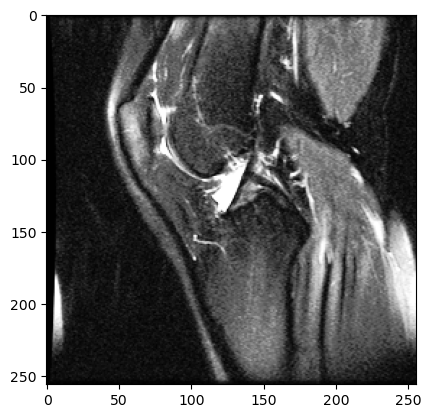

In [27]:
# List of file paths to the .npy files
file_path = "C:\\Users\\heath\\OneDrive - University of Ottawa\\Courses\\BIOM5202\\MRNet-v1.0\\MRNet-v1.0\\train\\sagittal\\0099.npy"
img = np.load(file_path)
img_slice = img[9]

plt.imshow(img_slice, cmap="Greys_r");

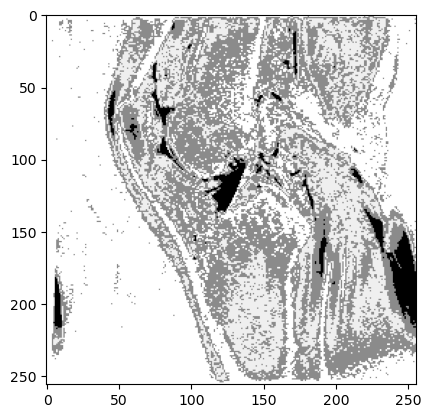

In [45]:
def kmeans_segmentation(img, k=5):
    # Get the height and width of the image
    h, w = img.shape

    # reshape to 1D array
    image_2d = img.reshape(h*w,1)

    # Perform k-means clustering using sklearn library
    kmeans_cluster = cluster.KMeans(n_clusters=k, n_init=10, random_state=140)
    kmeans_cluster.fit(image_2d)
    cluster_centers = kmeans_cluster.cluster_centers_
    cluster_labels = kmeans_cluster.labels_

    # Scale result to the range 0-255
    newimage = cluster_centers[cluster_labels].reshape(h, w)*255.0
    newimage = newimage.astype('uint8')

    return newimage

kmeans = kmeans_segmentation(img_slice)
#kmeans = kmeans <= 45
#plt.hist(kmeans.ravel())
plt.imshow(kmeans, cmap="Greys_r")

(256, 256)
uint8


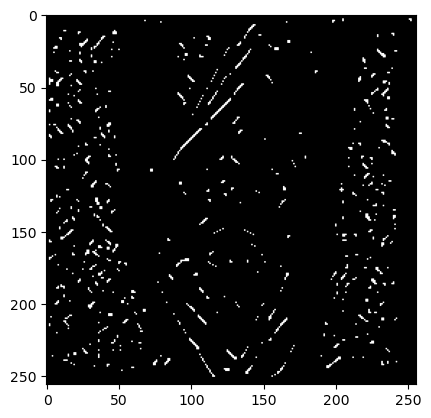

In [24]:
# Apply median filter
filtered_img = ndimage.median_filter(img_slice, (3, 3))
plt.imshow(filtered_img, cmap="Greys_r")

print(filtered_img.shape)
print(filtered_img.dtype)

uint8
(256, 256)


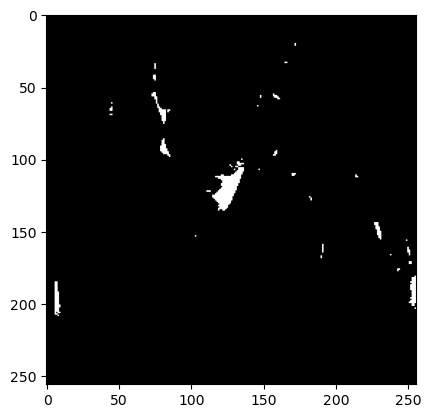

In [19]:
# Test histogram equalization
hist_eq = exposure.equalize_hist(img_slice)
hist_eq = hist_eq.astype(np.uint8)
plt.imshow(hist_eq, cmap="Greys_r")



print(hist_eq.dtype)
print(hist_eq.shape)

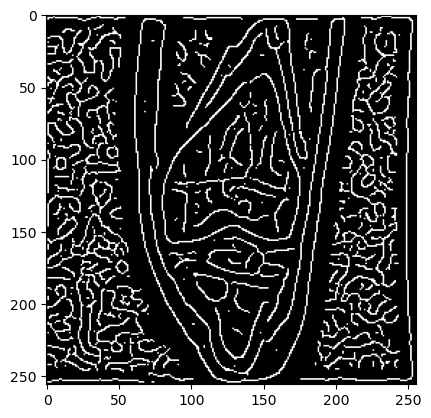

In [21]:
# List of file paths to the .npy files
file_path = "C:\\Users\\heath\\projects\\uOttawa\\classes\\mrnet-output\\run_20231201_122101\\train\\coronal\\0099.npy"
img = np.load(file_path)
img_slice = img[9]

plt.imshow(img_slice, cmap="Greys_r");

uint8


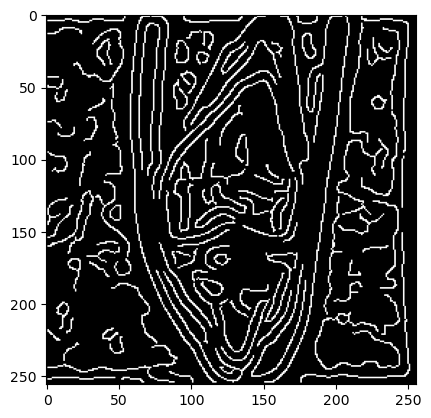

In [14]:
def canny_edge(img):
    edge_canny = feature.canny(img.astype('float32'), sigma=3)
    edge_canny = edge_canny.astype(np.uint8) * 255
    return edge_canny

canny = canny_edge(img_slice)

print(canny.dtype)
plt.imshow(canny, cmap="Greys_r")

(256, 256)
float64


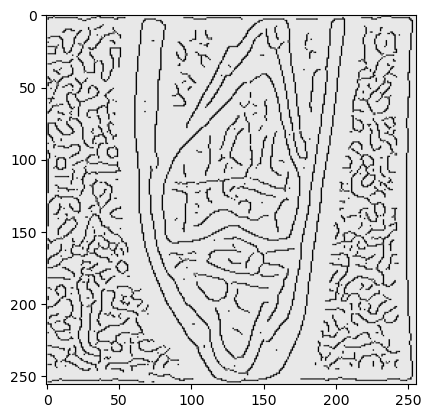

In [25]:
def apply_lbp(img, radius=1, n_points=5):
    lbp = feature.local_binary_pattern(img, P=n_points, R=radius, method='uniform')
    return lbp


lbp = apply_lbp(img_slice)
print(lbp.shape)
print(lbp.dtype)
plt.imshow(lbp, cmap="Greys_r")

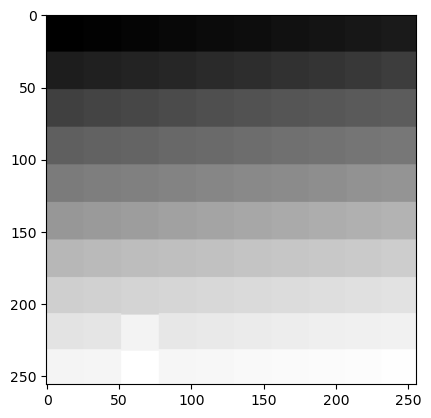

In [ ]:
def superpixel_segmentation(img, n_segments=100):
    img = img_as_float(img)
    segments = segmentation.slic(img, n_segments=n_segments, 
                                 compactness=40.0, sigma=3.0, channel_axis=None)
    return segments

superpixel = superpixel_segmentation(img_slice)
plt.imshow(superpixel, cmap="Greys_r")

In [7]:
def extract_glcm_features(img, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    img = img_as_ubyte(img) # Convert to 8-bit for GLCM
    glcm = feature.graycomatrix(img, distances=distances, angles=angles, symmetric=True, normed=True)
    return glcm

def calculate_contrast(glcm):
    # Calculate contrast from the GLCM
    contrast = feature.graycoprops(glcm, 'contrast')
    return contrast

glcm = extract_glcm_features(img_slice)
contrast = calculate_contrast(glcm)
print(contrast)
print(glcm.shape)

[[355.13267463 467.19094195 253.29770221 514.20890427]]
(256, 256, 1, 4)


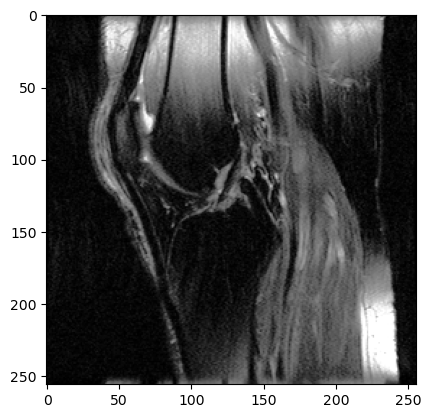

In [89]:
file_path = "C:\\Users\\heath\\OneDrive - University of Ottawa\\Courses\\BIOM5202\\MRNet-v1.0\\MRNet-v1.0\\train\\sagittal\\0100.npy"
img = np.load(file_path)
img_slice = img[12]

plt.imshow(img_slice, cmap="Greys_r");

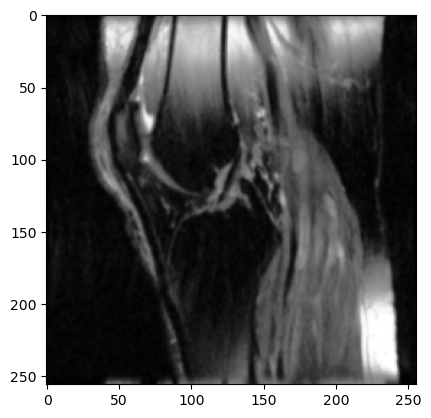

In [90]:
def gabor_filter(img, frequency=0.1, theta=0, sigma=1):
    img = img_as_ubyte(img)
    gabor_filter = filters.gabor(img, frequency=frequency, theta=theta, sigma_x=sigma, sigma_y=sigma)
    return gabor_filter

gabor_real, gabor_imag = gabor_filter(img_slice)
#print(gabor_real.dtype)
#print(gabor_real.shape)
plt.imshow(gabor_real, cmap="Greys_r")

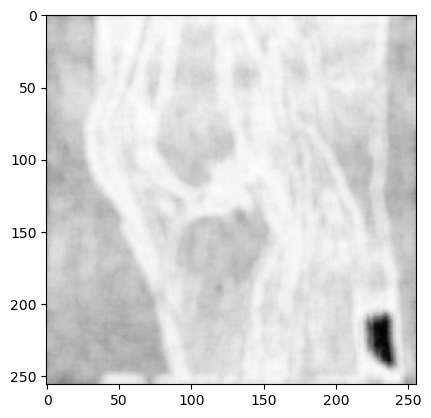

In [91]:
# Test skimage entropy
entropy_img = entropy(img_slice, disk(5)) # param of disk is radius of ACL
# Scale entropy image
entropy_img = (entropy_img - np.min(entropy_img)) / np.ptp(entropy_img)
plt.imshow(entropy_img, cmap="Greys_r")

In [92]:
# Apply median filter to entropy image
# filtered_img = ndimage.median_filter(entropy_img, (15, 15))
# plt.imshow(filtered_img, cmap="Greys_r")

# Apply minimum filter to entropy image
filtered_img = minimum(entropy_img, disk(15))
plt.imshow(filtered_img, cmap="Greys_r")

c:\Users\heath\anaconda3\envs\biom5202\Lib\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: Images of type float must be between -1 and 1.

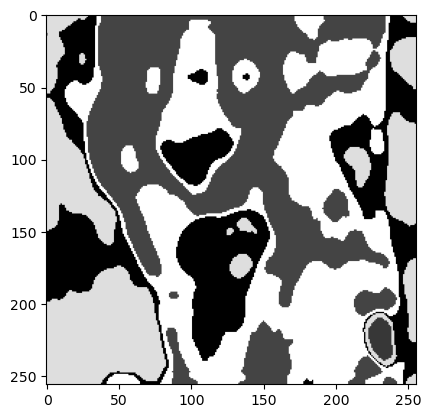

In [ ]:
# Try kmeans on entropy image
kmeans = kmeans_segmentation(filtered_img)
plt.imshow(kmeans, cmap="Greys_r")